Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import style
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

Loading the Datasets

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

Exploring the Data

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
total = train_df.isnull().sum().sort_values(ascending = False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending = False)
missing_data = pd.concat([total, percent_2], axis = 1, keys = ['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [8]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

1. Age and Sex

C:\Users\joker\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\joker\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\joker\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

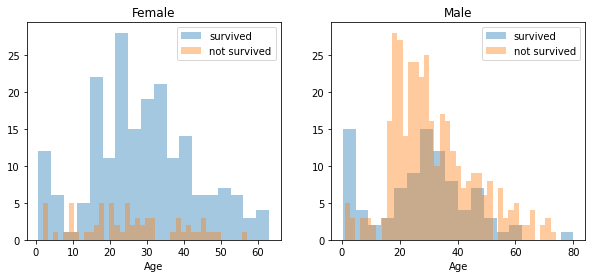

In [9]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
women = train_df[train_df['Sex'] == 'female']
men = train_df[train_df['Sex'] == 'male']
ax = sns.distplot(women[women['Survived'] == 1].Age.dropna(), bins = 18, label = survived, ax = axes[0], kde = False)
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(), bins = 40, label = not_survived, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived'] == 1].Age.dropna(), bins = 18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived'] == 0].Age.dropna(), bins = 40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

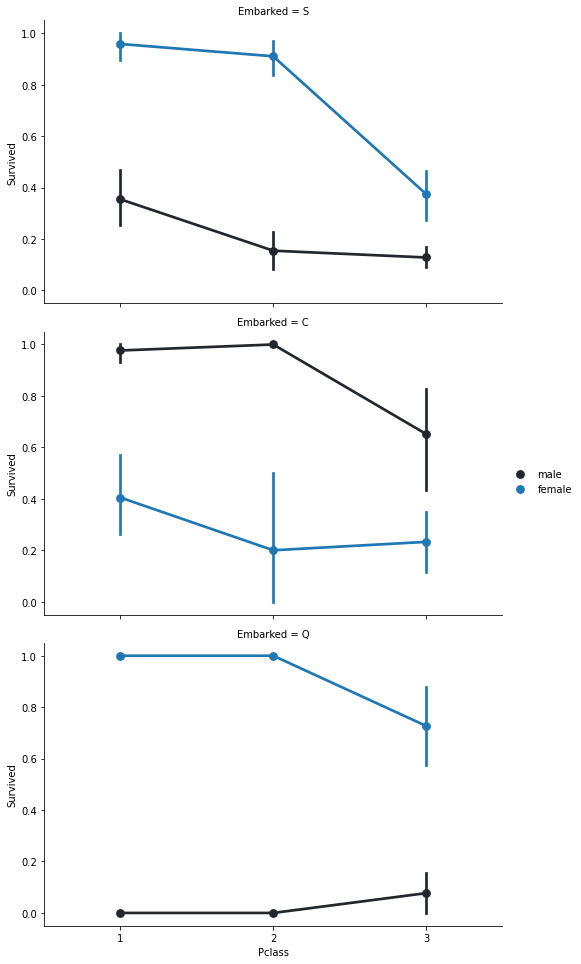

In [10]:
FacetGrid = sns.FacetGrid(train_df, row = 'Embarked', height = 4.5, aspect = 1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = None, order = None, hue_order = None)
FacetGrid.add_legend()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

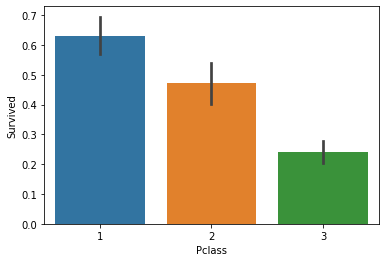

In [11]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train_df)

C:\Users\joker\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\joker\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


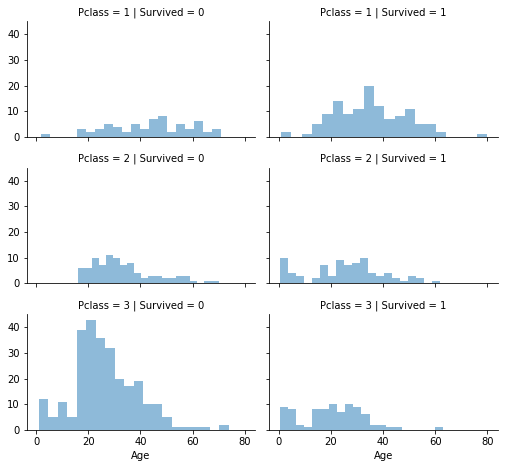

In [12]:
grid = sns.FacetGrid(train_df, col = 'Survived', row = 'Pclass', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = 0.5, bins = 20)
grid.add_legend()

In [13]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
    
train_df['not_alone'].value_counts()  

1    537
0    354
Name: not_alone, dtype: int64

C:\Users\joker\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\joker\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


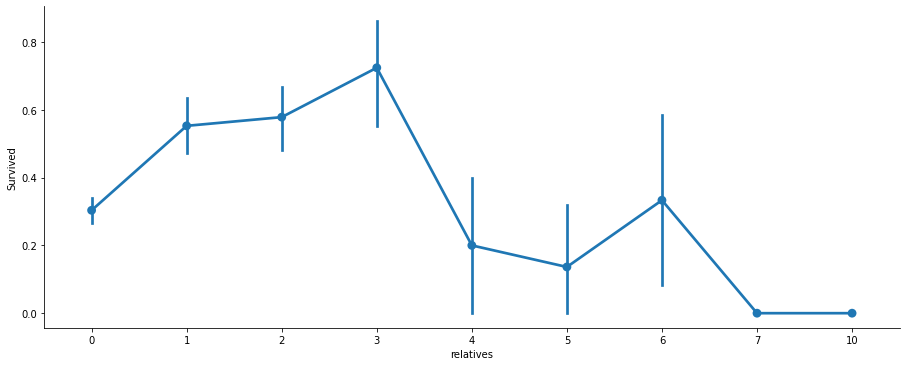

In [14]:
axes = sns.factorplot('relatives', 'Survived', data = train_df, aspect = 2.5)

In [15]:
train_df = train_df.drop(['PassengerId'], axis = 1)

In [16]:
import re
deck = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'U':8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna('UO')
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile('([a-zA-Z]+)').search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    
train_df = train_df.drop(['Cabin'], axis = 1)
test_df = test_df.drop(['Cabin'], axis = 1)

In [17]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df['Age'].mean()
    std = test_df['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    # Compute random numbers between the mean, std, is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # Fill NaN values in Age column with random values generated
    age_slice = dataset['Age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset['Age'] = age_slice
    dataset['Age'] = train_df['Age'].astype(int)
    
train_df['Age'].isnull().sum()    

0

In [18]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [19]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


In [21]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [22]:
data = [train_df, test_df]
titles = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand = False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df = train_df.drop(['Name'], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)

In [23]:
genders = {'male':0, 'female':1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [24]:
train_df['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [25]:
train_df = train_df.drop(['Ticket'], axis = 1)
test_df = test_df.drop(['Ticket'], axis = 1)

In [26]:
ports = {'S':0, 'C':1, 'Q':2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [27]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1 
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[dataset['Age'] > 66, 'Age'] = 6
    
train_df['Age'].value_counts()

4    163
6    162
5    145
3    137
2    117
1     99
0     68
Name: Age, dtype: int64

In [28]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,0,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,0,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,0,1
5,0,3,0,2,0,0,8,2,0,1,0,1
6,0,1,0,6,0,0,51,0,0,1,5,1
7,0,3,0,0,3,1,21,0,4,0,0,4
8,1,3,1,3,0,2,11,0,2,0,0,3
9,1,2,1,1,1,0,30,1,1,0,0,3


In [29]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare'] =  3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare'] = 4
    dataset.loc[dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [30]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class'] = dataset['Age'] + dataset['Pclass']

In [31]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives'] + 1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
    
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,0,1,5,0
1,1,1,1,5,1,0,3,1,1,0,3,3,6,1
2,1,3,1,3,0,0,0,0,0,1,0,2,6,0
3,1,1,1,5,1,0,3,0,1,0,3,3,6,1
4,0,3,0,5,0,0,1,0,0,1,0,1,8,1
5,0,3,0,2,0,0,1,2,0,1,0,1,5,1
6,0,1,0,6,0,0,3,0,0,1,5,1,7,3
7,0,3,0,0,3,1,2,0,4,0,0,4,3,0
8,1,3,1,3,0,2,1,0,2,0,0,3,6,0
9,1,2,1,1,1,0,2,1,1,0,0,3,3,1


In [32]:
X_train = train_df.drop('Survived', axis = 1)
y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis = 1).copy()

In [34]:
sgd = SGDClassifier(max_iter = 5, tol = None)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

In [35]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, y_train)
y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [36]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)

In [37]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

In [38]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

In [39]:
perceptron = Perceptron(max_iter = 10)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)

C:\Users\joker\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [40]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

C:\Users\joker\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [41]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [42]:
results = pd.DataFrame({'Model':['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochaistic Gradient Decent', 'Decision Tree'], 'Score':[acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by = 'Score', ascending = False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.37,Random Forest
92.37,Decision Tree
87.09,KNN
81.71,Logistic Regression
81.59,Support Vector Machines
79.35,Perceptron
77.78,Naive Bayes
54.66,Stochaistic Gradient Decent


In [43]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators = 100)
scores = cross_val_score(rf, X_train, y_train, cv = 10, scoring = 'accuracy')

print('Scores:', scores)
print('Mean:', scores.mean())
print('Standard Deviation:', scores.std())

Scores: [0.77777778 0.83146067 0.73033708 0.83146067 0.85393258 0.82022472
 0.80898876 0.7752809  0.87640449 0.83146067]
Mean: 0.813732833957553
Standard Deviation: 0.040345267444180474


In [44]:
importances = pd.DataFrame({'feature':X_train.columns, 'importance':np.round(random_forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.197
Sex,0.175
Age_Class,0.089
Deck,0.085
Age,0.081
Pclass,0.078
Fare,0.070
relatives,0.061
Embarked,0.053


<AxesSubplot:xlabel='feature'>

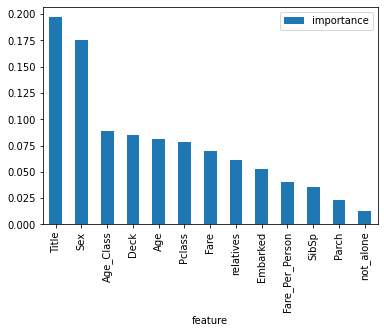

In [45]:
importances.plot.bar()

In [46]:
train_df = train_df.drop('not_alone', axis = 1)
test_df = test_df.drop('not_alone', axis = 1)
train_df = train_df.drop('Parch', axis = 1)
test_df = test_df.drop('Parch', axis = 1)

In [47]:
random_forest = RandomForestClassifier(n_estimators = 100, oob_score = True)
random_forest.fit(X_train, y_train)
random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest, 2,), '%')

92.37 %


In [48]:
print('oob score:', round(random_forest.oob_score_, 4) * 100, '%')

oob score: 81.03 %


In [49]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv = 3)
confusion_matrix(y_train, predictions)

array([[480,  69],
       [105, 237]], dtype=int64)

In [56]:
from sklearn.metrics import precision_score, recall_score
print('Precision:', precision_score(y_train, predictions))
print('Recall:', recall_score(y_train, predictions))

Precision: 0.7745098039215687
Recall: 0.6929824561403509


In [57]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.7314814814814816

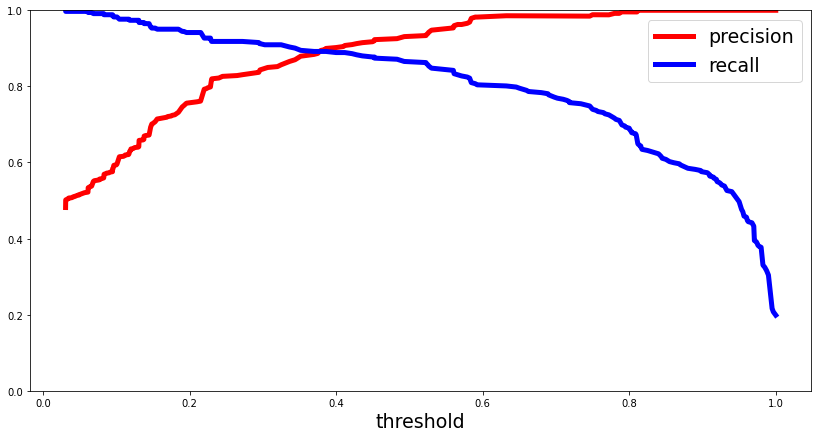

In [61]:
from sklearn.metrics import precision_recall_curve
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]
precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], 'r-', label = 'precision', linewidth = 5)
    plt.plot(threshold, recall[:-1], 'b', label = 'recall', linewidth = 5)
    plt.xlabel('threshold', fontsize = 19)
    plt.legend(loc = 'upper right', fontsize = 19)
    plt.ylim([0, 1])
plt.figure(figsize = (14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

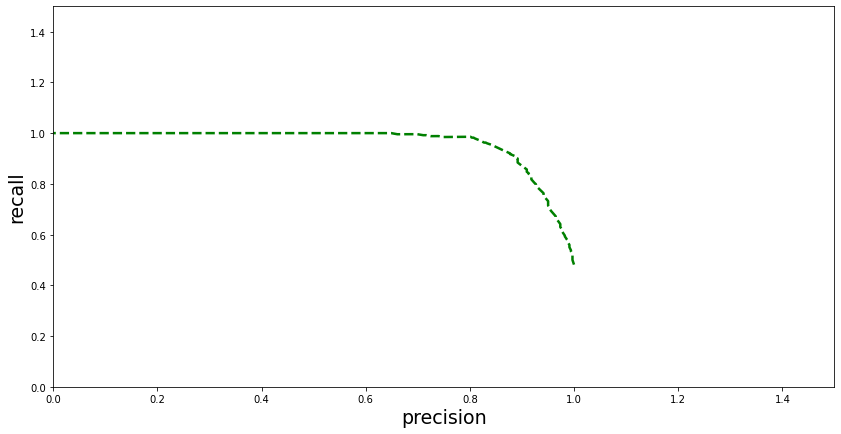

In [62]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, 'g--', linewidth = 2.5)
    plt.ylabel('recall', fontsize = 19)
    plt.xlabel('precision', fontsize = 19)
    plt.axis([0,1.5,0,1.5])
    
plt.figure(figsize = (14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

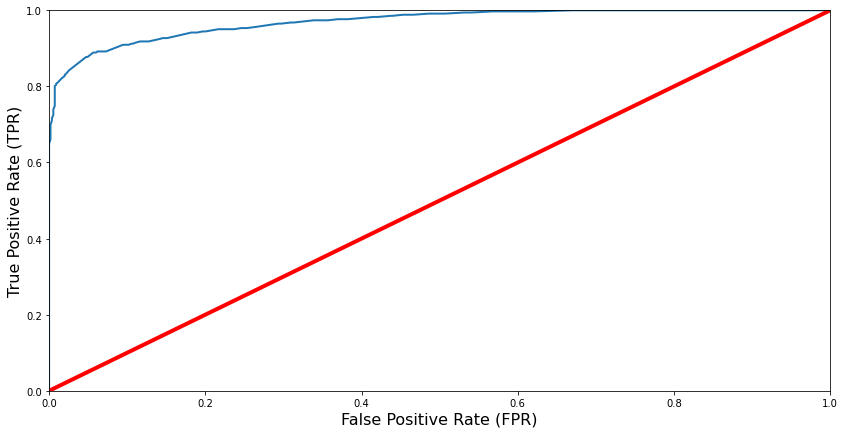

In [63]:
from sklearn.metrics import roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(false_positive_rate, true_positive_rate, label = None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], 'r', linewidth = 4)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (FPR)', fontsize = 16)
    plt.ylabel('True Positive Rate (TPR)', fontsize = 16)
    
plt.figure(figsize = (14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [65]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print('Roc-Auc-Score:', r_a_score)

Roc-Auc-Score: 0.9696364469157106
